<a href="https://colab.research.google.com/github/nicol2020/UV-SINTEC/blob/master/Mirror_points_9LEDs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Current 450mA

430nm LED - 7.17 W/m^2 at 10cm distance, 64deg angle

660nm LED - 5.54 W/m^2 at 10cm distance, 63deg angle

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d

In [ ]:
z = 0.20 #Distance from plane to lamp
px = 0.30 # size of plane in x direction
py = 0.30 # size of plane in y direction
hA = 63# LED Half angle
num = (px*100) + 1 #1 cm between points on the plane
num = int(num)# set num to integer for indexing purposes

#Distances of the individual mirrors from the edge of LED plane 
r_mirror_d = 0.05 #Right mirror
l_mirror_d = 0.05 #Left mirror
b_mirror_d = 0.05 #Back mirror
f_mirror_d = 0.05 #Front mirror
#Set all mirrors equal distance from plane, comment out these lines if you want the mirrors at different distances
#l_mirror_d = r_mirror_d
#b_mirror_d = r_mirror_d
#f_mirror_d = r_mirror_d

mirror_height = 'bottom' #If you wish to reduce mirror height from bottom up set this to 'bottom', if you want to reduce height
#from top down set this to 'top'
z_mirror = 0.10 # Mirror Height 

In [ ]:
#User interface: Asks the user to enter the LED coordinates
#When entering coordinates the code will ask where you want point (0,0) to be on the plane
coordinates = [] #Storage of coordinates
n = input("Enter the number of LEDs you wish to use:\n")
n = int(n)#Number of LEDs
zero_zero = input("Enter 'left' if you wish to position point (0,0) at the bottom left of plane, enter 'centre if you want point (0,0) to be at the centre of the plane' ")
zero_zero = str(zero_zero)#User (0,0) preference
i = 1 #Begin the loop at 1
while i < n + 1:
    LEDX = input("Enter x coordinate of LED %s:\n"% (i))
    LEDX = float(LEDX)
    LEDY = input("Enter y coordinate of LED %s:\n"% (i))
    LEDY = float(LEDY)
    if zero_zero == 'centre':
        LEDX = LEDX + px/2
        LEDY = LEDY + py/2
    coordinate = [LEDX,LEDY]
    coordinates.append(coordinate)
    i += 1


Enter the number of LEDs you wish to use:
8
Enter 'left' if you wish to position point (0,0) at the bottom left of plane, enter 'centre if you want point (0,0) to be at the centre of the plane' centre
Enter x coordinate of LED 1:
-0.13
Enter y coordinate of LED 1:
0
Enter x coordinate of LED 2:
-0.13
Enter y coordinate of LED 2:
-0.13
Enter x coordinate of LED 3:
-0.13
Enter y coordinate of LED 3:
0.13
Enter x coordinate of LED 4:
0
Enter y coordinate of LED 4:
0.13
Enter x coordinate of LED 5:
0
Enter y coordinate of LED 5:
-0.13
Enter x coordinate of LED 6:
0.13
Enter y coordinate of LED 6:
0
Enter x coordinate of LED 7:
0.13
Enter y coordinate of LED 7:
-0.13
Enter x coordinate of LED 8:
0.13
Enter y coordinate of LED 8:
0.13


In [ ]:
#User interface: Asks the user to enter Intensity value and half angle for the LEDs


hA_list = []#Creating blank array for storing the half angle values of the LEDs
I_list = []#Creating blank array for storing the intensity values of the LEDs

Intensity_and_hA = input("If all LEDs have the same intensity and half angle enter yes, if not enter no")
Intensity_and_hA = str(Intensity_and_hA)
        

    
if Intensity_and_hA == 'yes':
    hA = input("Enter a value for the half angle of the LEDs in degrees:\n")
    hA = float(hA)
    density_or_intensity = input("Enter i if you wish to give LED intensity in Watts, enter d if you wish to give intensity as density at a given height")
    density_or_intensity = str(density_or_intensity)
    
    if density_or_intensity == 'i':
        I = input("Enter a value for the intensity of the LEDs in W:\n")
        I = float(I)
    
    elif density_or_intensity == 'd':
        I_zero = input("Enter a value for the intensity of the LEDs at a height in W/m^2:\n")
        I_zero = float(I_zero)
        h = input("Enter the height in m:\n")
        h = float(h)
        I = I_zero*(h**2)
    
    
    i = 1
    while i < n + 1:
        hA_list.append(hA)#Adds the half angle value for each LED to an array
        I_list.append(I)#Adds the intensity value for each LED to an array
        i += 1

        
elif Intensity_and_hA == 'no':
    i = 1
    density_or_intensity = input("Enter i if you wish to give LED intensity in Watts, enter d if you wish to give intensity as density at a given height")
    density_or_intensity = str(density_or_intensity)
    while i < n + 1:
        hA = input("Enter a value for the LED half angle in degrees of LED %s:\n"% (i))
        hA = float(hA) #User input half angle
        

        if density_or_intensity == 'i':
            I = input("Enter a value for the intensity of the LED %s in W:\n"% (i))
            I = float(I)
    
        elif density_or_intensity == 'd':
            I_zero = input("Enter a value for the intensity of the LED %s at a height in W/m^2:\n"% (i))
            I_zero = float(I_zero)
            h = input("Enter the height in m:\n")
            h = float(h)
            I = I_zero*(h**2)
        hA_list.append(hA)#Adds the half angle value for each LED to an array
        I_list.append(I)#Adds the intensity value for each LED to an array
        i += 1

If all LEDs have the same intensity and half angle enter yes, if not enter noyes
Enter a value for the half angle of the LEDs in degrees:
63
Enter i if you wish to give LED intensity in Watts, enter d if you wish to give intensity as density at a given heightd
Enter a value for the intensity of the LEDs at a height in W/m^2:
5.54
Enter the height in m:
0.10


In [ ]:
x = np.outer(1,np.linspace(0,px,num)) #Position on plane in x direction
x = np.round(x,3)
y = np.outer(np.linspace(0,py,num),1) #Position on plane in y direction
y = np.round(y,3)

X, Y = np.meshgrid(x,y) #This is required to enable the contour plot

E = 0
for j in range(0,n,1):
    
    E_new = E
    coor = coordinates[j]
    ledx = coor[0]
    ledy = coor[1]
    I = I_list[j]
    hA = hA_list[j]
    if hA == 60:
        p = 0
    else:
        p = -(np.log(2)/np.log(np.cos(np.radians(hA))) ) #Variable for changing viewing angle of LED
    
    opp = np.sqrt((X-ledx)**2+(Y-ledy)**2) #Calculating the parallel distance from the LED to the point on the plane
    hyp = np.sqrt(z**2 + opp**2) #Calculating the straight line distance from the LED to the point on the plane
    E_n = ((z**(p+1))*I ) / ((hyp**2)**((p+3)/2)) #irradiance of each point on the plane in W/m^2
    E = E_n + E_new    
M = np.max(E) #Peak of the matrix E
minimum = np.min(E) #Minimum irradiance on plane
print(minimum)
print(M)
print(f"Unifotmiy: {minimum/M}" )

3.1242666466212077
4.4886299056485335
Unifotmiy: 0.6960401530742379


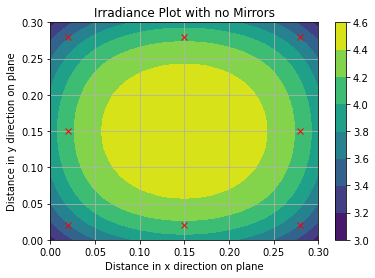

In [ ]:
#Plot of light intensity with no mirrors present

#V = [0.4,0.5,0.6,0.7,0.8,0.9,0.95,1] #Can use this to set specific contour lines
#E = E/M #Uncomment this line if you wish to view uniformity plot
#E = E*M
fig,ax = plt.subplots(1,1)
cp = ax.contourf(X,Y,E)
#cp = ax.contourf(X,Y,E,V) #Use this line if you are using your own contour lines
#Plots LED position
for j in range(0,n,1):
    coor = coordinates[j]
    ledx = coor[0]
    ledy = coor[1]
    plt.plot(ledx,ledy,'rx')
fig.colorbar(cp)
plt.title("Irradiance Plot with no Mirrors")
plt.xlabel("Distance in x direction on plane")
plt.ylabel("Distance in y direction on plane")
plt.grid()
#E = E*M #Make sure to uncomment this line if this is a uniformity plot so correct irradiacne values will be added to mirror values

In [ ]:
loop = 0
E_total = E
while loop < n:
    
    coor = coordinates[loop]
    ledx = coor[0]
    ledy = coor[1]
    I = I_list[loop]
    hA = hA_list[loop]
    #Right Mirror
    if hA == 60:
        p = 0
    else:
        p = -(np.log(2)/np.log(np.cos(np.radians(hA))) ) ### !!!!!!! CORRECT
    #Calculating positions on mirror in z and y direction where light is reflected to each point on the plane
    ledX = px + r_mirror_d - ledx
    mirror_x = X
    mirror_x = px + r_mirror_d - mirror_x
    mirror_z = mirror_x*z/(mirror_x + ledX)
    y_solve = mirror_x/ledX
    mirror_y = (y_solve*ledy + Y)/(y_solve + 1)

    #Calculating the distance the ray travels before hitting the plane
    #Reflected
    dist_r = np.sqrt((Y - mirror_y)**2)
    adj_r = np.sqrt(mirror_z**2 + dist_r**2)
    hyp_r = np.sqrt(mirror_x**2 + adj_r**2)

    #Incident
    dist_i = np.sqrt((ledy - mirror_y)**2)
    adj_i = np.sqrt((z - mirror_z)**2 + dist_i**2)
    hyp_i = np.sqrt(ledX**2 + adj_i**2)

    hyp_total = hyp_i + hyp_r

    E_mirror_r = ((z**(p+1))*I ) / ((hyp_total**2)**((p+3)/2)) #!!!!!!!!!!CORRECT

    irradiance_removal = []
    for i in range(0,num,1):
        height_check = mirror_z[0,i]
        if mirror_height == 'top':
            if height_check > z_mirror:
                irradiance_removal.append(i)
        elif mirror_height == 'bottom':
            if height_check < z - z_mirror:
                irradiance_removal.append(i)

    for ele in irradiance_removal:
        ele = int(ele)
        for j in range(0,num,1):
             E_mirror_r[j,ele] = 0

    E_total = E_mirror_r + E_total
    
    
    #Left Mirror

    #Calculating positions on mirror in z and y direction where light is reflected to each point on the plane
    
    ledX = l_mirror_d + ledx
    mirror_x = X
    mirror_x = r_mirror_d + mirror_x

    mirror_z = mirror_x*z/(mirror_x + ledX)
    y_solve = mirror_x/ledX
    mirror_y = (y_solve*ledy + Y)/(y_solve + 1)

    #Calculating the distance the ray travels before hitting the plane

    #Reflected
    dist_r = np.sqrt((Y - mirror_y)**2)
    adj_r = np.sqrt(mirror_z**2 + dist_r**2)
    hyp_r = np.sqrt(mirror_x**2 + adj_r**2)

    #Incident
    dist_i = np.sqrt((ledy - mirror_y)**2)
    adj_i = np.sqrt((z - mirror_z)**2 + dist_i**2)
    hyp_i = np.sqrt(ledX**2 + adj_i**2)

    hyp_total = hyp_i + hyp_r

    E_mirror_l = ((z**(p+1))*I ) / ((hyp_total**2)**((p+3)/2)) #!!!!!!!!!!CORRECT

    irradiance_removal = []
    for i in range(0,num,1):
        height_check = mirror_z[0,i]
        if mirror_height == 'top':
            if height_check > z_mirror:
                irradiance_removal.append(i)
        elif mirror_height == 'bottom':
            if height_check < z - z_mirror:
                irradiance_removal.append(i)

    for ele in irradiance_removal:
        ele = int(ele)
        for j in range(0,num,1):
             E_mirror_l[j,ele] = 0

    E_total = E_mirror_l + E_total
    
    
    #Back Mirror

    #Calculating positions on mirror in z and y direction where light is reflected to each point on the plane
    ledY = py + b_mirror_d - ledy
    mirror_y = Y
    mirror_y = py + b_mirror_d - mirror_y

    mirror_z = mirror_y*z/(mirror_y + ledY)
    x_solve = mirror_y/ledY
    mirror_x = (x_solve*ledx + X)/(x_solve + 1)

    #Calculating the distance the ray travels before hitting the plane

    #Reflected
    dist_r = np.sqrt((X - mirror_x)**2)
    adj_r = np.sqrt(mirror_z**2 + dist_r**2)
    hyp_r = np.sqrt(mirror_y**2 + adj_r**2)

    #Incident
    dist_i = np.sqrt((ledx - mirror_x)**2)
    adj_i = np.sqrt((z - mirror_z)**2 + dist_i**2)
    hyp_i = np.sqrt(ledY**2 + adj_i**2)

    hyp_total = hyp_i + hyp_r

    E_mirror_b = ((z**(p+1))*I ) / ((hyp_total**2)**((p+3)/2)) #!!!!!!!!!!CORRECT

    irradiance_removal = []
    for i in range(0,num,1):
        height_check = mirror_z[i]
        if mirror_height == 'bottom':
            if np.max(height_check) < z - z_mirror:
                irradiance_removal.append(i)
        elif mirror_height == 'top':
            if np.max(height_check) > z_mirror:
                irradiance_removal.append(i)

    for ele in irradiance_removal:
        ele = int(ele)
        for t, elem in enumerate(E_mirror_b[ele]):
            E_mirror_b[ele][t] = 0

    E_total = E_mirror_b + E_total
    
    
    #Front Mirror

    #Calculating positions on mirror in z and y direction where light is reflected to each point on the plane
    ledY = f_mirror_d + ledy
    mirror_y = Y
    mirror_y = f_mirror_d + mirror_y

    mirror_z = mirror_y*z/(mirror_y + ledY)
    x_solve = mirror_y/ledY
    mirror_x = (x_solve*ledx + X)/(x_solve + 1)

    #Calculating the distance the ray travels before hitting the plane

    #Reflected
    dist_r = np.sqrt((X - mirror_x)**2)
    adj_r = np.sqrt(mirror_z**2 + dist_r**2)
    hyp_r = np.sqrt(mirror_y**2 + adj_r**2)

    #Incident
    dist_i = np.sqrt((ledx - mirror_x)**2)
    adj_i = np.sqrt((z - mirror_z)**2 + dist_i**2)
    hyp_i = np.sqrt(ledY**2 + adj_i**2)

    hyp_total = hyp_i + hyp_r

    E_mirror_f = ((z**(p+1))*I ) / ((hyp_total**2)**((p+3)/2)) #!!!!!!!!!!CORRECT


    irradiance_removal = []
    for i in range(0,num,1):
        height_check = mirror_z[i]
        if mirror_height == 'bottom':
            if np.max(height_check) < z - z_mirror:
                irradiance_removal.append(i)
        elif mirror_height == 'top':
            if np.max(height_check) > z_mirror:
                irradiance_removal.append(i)

    for ele in irradiance_removal:
        ele = int(ele)
        for t, elem in enumerate(E_mirror_f[ele]):
            E_mirror_f[ele][t] = 0



    E_total = E_mirror_f + E_total
    
    loop += 1
    
M = np.max(E_total) #Peak of the matrix E
minimum = np.min(E_total) #Minimum irradiance on plane
print(minimum)
print(M)
print(f"Unifotmiy: {minimum/M}" )

3.4996932071764366
6.802099438028968
Unifotmiy: 0.5145019179829186


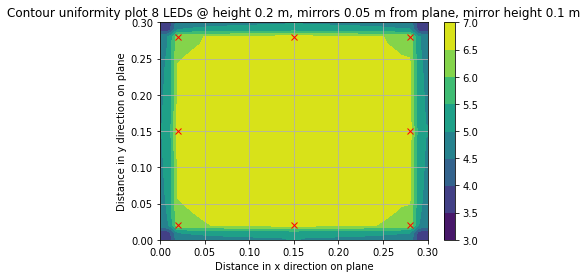

In [ ]:
#V = [0.4,0.5,0.6,0.7,0.8,0.9,0.95,1]
#E_total = E_total/M
#E_total = E_total*M
fig,ax = plt.subplots(1,1)
cp = ax.contourf(X,Y,E_total)
for j in range(0,n,1):
    coor = coordinates[j]
    ledx = coor[0]
    ledy = coor[1]
    plt.plot(ledx,ledy,'rx')
fig.colorbar(cp)
plt.title("Contour uniformity plot %s LEDs @ height %s m, mirrors %s m from plane, mirror height %s m" % (n,z,r_mirror_d, z_mirror))
#plt.title("Uniformity Plot with no Mirrors")
plt.xlabel("Distance in x direction on plane")
plt.ylabel("Distance in y direction on plane")
plt.grid()
#E_total = E_total*M